In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_excel('News_category.xlsx')
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


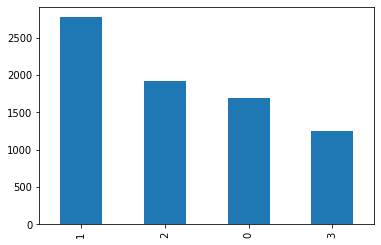

In [5]:
df.SECTION.value_counts().plot.bar()

In [6]:
df.isnull().mean()

STORY      0.0
SECTION    0.0
dtype: float64

In [8]:
df.describe()

,SECTION
count,7628.000000
mean,1.357892
std,0.999341
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7628 entries, 0 to 7627
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   STORY    7628 non-null   object
 1   SECTION  7628 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.3+ KB


In [11]:
import tensorflow as tf

In [12]:
tf.__version__

'2.3.1'

In [13]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

import nltk
import re
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sameer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [15]:
voc_size=5000

In [16]:
#data preprocessing

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(df['STORY'])):
    news=re.sub('[^a-zA-Z]',' ',df['STORY'][i])
    news=news.lower()
    news=news.split()
    news=[ps.stem(word) for word in news if not word in stopwords.words('english')]
    news=' '.join(news)
    corpus.append(news)

In [17]:
corpus

['pain huge revers fee incom unheard among privat sector lender essenti mean ye bank took grant fee structur loan deal paid account upfront book borrow turn default fee tie loan deal fell crack gill vow shift safer account practic amort fee incom rather book upfront gill move mend past way mean nasti surpris futur good news consid investor love clean imag loath uncertainti gain without pain promis strong stabl balanc sheet come sacrific well investor give hope phenomen growth promis made kapoor',
 'formid opposit allianc among congress jharkhand mukti morcha jmm jharkhand vika morcha prajatantrik',
 'asian currenc trade lower today south korean china renminbi china offshor malaysian ringgit indonesian rupiah taiwan dollar howev japanes yen dollar index measur us currenc strength major currenc trade previou close',
 'want answer question click answer click answer also check repli user proceed answer either write voic command want ask question click ask question question prefix alreadi i

In [19]:
#One Hot representation

onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[245,
  874,
  3497,
  2717,
  3760,
  882,
  376,
  3159,
  4025,
  2094,
  3814,
  1729,
  1183,
  2124,
  3613,
  3021,
  2717,
  2306,
  111,
  4335,
  862,
  581,
  1986,
  3249,
  2602,
  1432,
  132,
  2717,
  3645,
  111,
  4335,
  4084,
  4036,
  387,
  1658,
  682,
  4056,
  581,
  1903,
  1847,
  2717,
  3760,
  2607,
  3249,
  1986,
  387,
  4541,
  2472,
  1617,
  3327,
  1729,
  2855,
  2784,
  4971,
  4523,
  1733,
  4715,
  1368,
  1512,
  124,
  1127,
  2389,
  4698,
  2234,
  3208,
  245,
  2742,
  268,
  1061,
  1440,
  1728,
  3078,
  849,
  67,
  1368,
  1497,
  1525,
  3453,
  1019,
  2742,
  1676,
  2634],
 [999, 1531, 2419, 376, 2241, 4834, 2849, 1291, 3493, 4834, 3431, 1291, 372],
 [3545,
  2468,
  3003,
  3949,
  3749,
  51,
  4279,
  1510,
  3071,
  1510,
  4330,
  842,
  4884,
  1403,
  4783,
  1952,
  3001,
  189,
  121,
  3060,
  3001,
  146,
  3182,
  430,
  2468,
  1764,
  3362,
  2468,
  3003,
  4455,
  3013],
 [3611,
  4618,
  1273,
  4911,
  4618,
  

In [20]:
#now pass this ONR vectors to the embedding layer

sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [24]:
embedded_docs[0]

array([4036,  387, 1658,  682, 4056,  581, 1903, 1847, 2717, 3760, 2607,
       3249, 1986,  387, 4541, 2472, 1617, 3327, 1729, 2855, 2784, 4971,
       4523, 1733, 4715, 1368, 1512,  124, 1127, 2389, 4698, 2234, 3208,
        245, 2742,  268, 1061, 1440, 1728, 3078,  849,   67, 1368, 1497,
       1525, 3453, 1019, 2742, 1676, 2634])

In [32]:
embedding_vector_features=40
model=Sequential()
from tensorflow.keras.layers import Dropout
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.5))
model.add(LSTM(200))
model.add(Dense(4,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 50, 40)            200000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 50, 40)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 200)               192800    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 804       
Total params: 393,604
Trainable params: 393,604
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
X_final=np.array(embedded_docs)

In [35]:
y_final=np.array(df.SECTION)

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X_final,y_final,test_size=0.3,random_state=42)

In [40]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
84/84 [==============================] - 12s 141ms/step - loss: 1.0924 - accuracy: 0.5147 - val_loss: 0.5978 - val_accuracy: 0.7785
Epoch 2/10
84/84 [==============================] - 11s 135ms/step - loss: 0.3681 - accuracy: 0.8738 - val_loss: 0.2733 - val_accuracy: 0.9187
Epoch 3/10
84/84 [==============================] - 11s 131ms/step - loss: 0.1752 - accuracy: 0.9550 - val_loss: 0.1974 - val_accuracy: 0.9406
Epoch 4/10
84/84 [==============================] - 11s 131ms/step - loss: 0.1171 - accuracy: 0.9725 - val_loss: 0.1974 - val_accuracy: 0.9423
Epoch 5/10
84/84 [==============================] - 11s 132ms/step - loss: 0.0817 - accuracy: 0.9801 - val_loss: 0.2195 - val_accuracy: 0.9406
Epoch 6/10
84/84 [==============================] - 11s 132ms/step - loss: 0.0632 - accuracy: 0.9841 - val_loss: 0.1826 - val_accuracy: 0.9493
Epoch 7/10
84/84 [==============================] - 11s 131ms/step - loss: 0.0481 - accuracy: 0.9893 - val_loss: 0.2393 - val_accuracy: 0.9380

In [42]:
y_pred=np.argmax(model.predict(X_test), axis=-1)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test,y_pred)

0.9410222804718218

## Repeat the process for test data

In [45]:
test_data=pd.read_excel('News_category_test.xlsx')
test_data.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
corpus=[]
for i in range(0,len(test_data['STORY'])):
    news=re.sub('[^a-zA-Z]',' ',test_data['STORY'][i])
    news=news.lower()
    news=news.split()
    news=[ps.stem(word) for word in news if not word in stopwords.words('english')]
    news=' '.join(news)
    corpus.append(news)

In [48]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

[[3503,
  3317,
  3235,
  4417,
  2282,
  4705,
  544,
  3812,
  734,
  1211,
  4496,
  960,
  3650,
  4116,
  4121,
  1302,
  4485,
  310,
  2263,
  891,
  870,
  3650,
  2212,
  1872,
  4617,
  3340,
  544,
  1082,
  3650,
  639,
  3317,
  41,
  688,
  3807,
  3198,
  430,
  1292,
  3312,
  2660,
  4686,
  4755,
  218,
  4150,
  213,
  1008,
  3503,
  3317,
  734,
  1211,
  4496,
  960,
  3650,
  4116,
  1155,
  3503,
  2282,
  319,
  3026,
  319,
  407,
  4275,
  4541,
  3620,
  3919,
  4102,
  1663,
  1676,
  191,
  3988,
  3775,
  3873,
  1558,
  35,
  2084,
  3673,
  3590,
  2489,
  1521,
  3208,
  4829,
  430,
  2697,
  2520,
  3704,
  4822,
  3515,
  319,
  407,
  1124,
  3765,
  1535,
  504,
  979,
  2016,
  705,
  319,
  407,
  1155,
  2219,
  2954,
  1008,
  2016,
  2282,
  2876,
  4313,
  1557,
  3615,
  1245,
  172,
  4395,
  1887,
  3914,
  4144,
  1155,
  2520,
  319,
  407,
  2954,
  1008,
  3680,
  1154,
  3386,
  503,
  3345,
  1770,
  218,
  319,
  407,
  4125,
  450

In [49]:
sent_length=50
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)

In [50]:
final_pred = np.argmax(model.predict(embedded_docs), axis=-1)

In [51]:
test_data['SECTION']=final_pred

In [53]:
test_data.to_csv('Final_submission_news.csv')